# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import os

from waymo_open_dataset import dataset_pb2 as open_dataset
from waymo_open_dataset.utils import range_image_utils
from waymo_open_dataset.utils import transform_utils
from waymo_open_dataset.utils import  frame_utils

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow.compat.v1 as tf
import cv2
from matplotlib.patches import Rectangle

%matplotlib inline

In [2]:
tf.config.list_physical_devices('GPU')

2021-11-06 17:02:07.370711: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


[]

In [3]:

data_dir = './data/train/*.tfrecord'
dataset = get_dataset(data_dir)



INFO:tensorflow:Reading unweighted datasets: ['./data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 61
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [12]:
def display_instances(batch,index):
    color_map = {1: [1, 0, 0], 2: [0, 0, 1], 4:[0, 1, 0]}

    _, ax = plt.subplots(1, figsize=(10, 10))
    image = batch["image"].numpy()
    h, w, _c = image.shape
    ax.imshow(image.astype(np.uint8))
    
    boxes = batch["groundtruth_boxes"].numpy()
    print(image.shape)
          
    boxes[:, (0, 2)] *= h * h / 1280
    boxes[:, (1, 3)] *= w * w / 1920
    
    labels = batch["groundtruth_classes"].numpy()
    classes = batch['groundtruth_classes'].numpy()
    
    for box, label in zip(boxes, labels):
        y1, x1, y2, x2 = box           
             
        ax.add_patch(patches.Rectangle( xy=(x1, y1),
                                       width=(x2-x1),
                                       height=(y2-y1),
                                       linewidth=2,
                                       edgecolor=color_map[label],
                                       facecolor='none'))
        
    plt.grid(False)
    plt.axis('off')
    plt.show()
    


        
    return

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

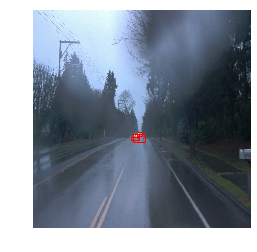

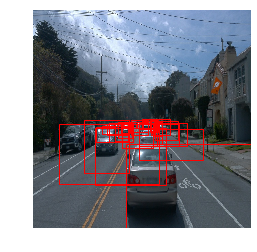

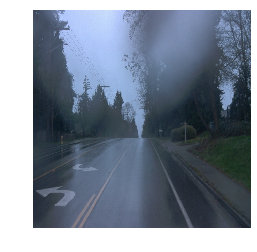

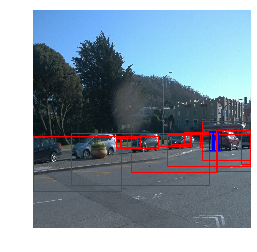

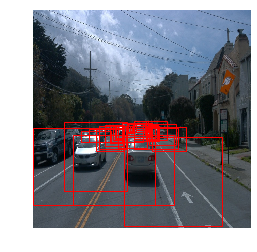

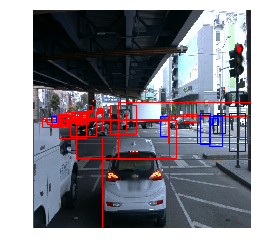

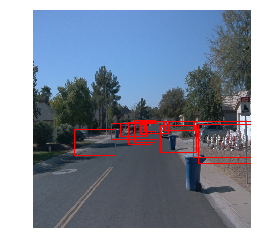

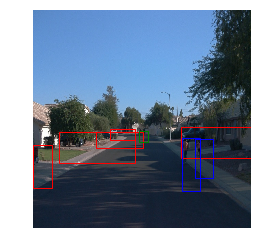

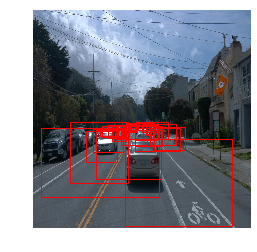

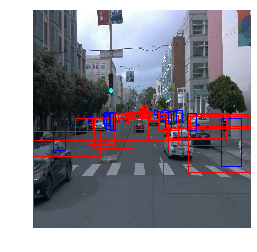

In [13]:


# Number of images to show
num_images = 10

# Show images and bbox in for loop (num_images)
for index, batch in enumerate(dataset.shuffle(75, reshuffle_each_iteration=True).take(num_images)):
    display_instances(batch, index)




## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data? For example, think about data distribution. So far, you have only looked at a single file...


In [1]:
## STUDENT SOLUTION HERE
# calculate class distribution in training dataset
n_data = 500
batch = dataset.take(500)
counts = {1:0, 2:0, 4:0}
num_object_per_image = []

for sample in batch:
    label_image = sample['groundtruth_classes'].numpy()
    num_object_per_image.append(len(label_image))
    for l in label_image:
        counts[l] += 1

NameError: name 'dataset' is not defined

In [ ]:
plt.hist(num_object_per_image, bins=10)
plt.title("objects per image distribution")
plt.xlabel("number of objects per image")
plt.ylabel("number of images")
plt.show()
no_obj_counts = 0
for n_obj in num_object_per_image:
    if n_obj == 0:
        no_obj_counts = no_obj_counts+1
print("only", no_obj_counts, "images have no objects")